<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklern_Regression_Logistic_or_LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py

--2020-12-21 17:09:07--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494 (1.5K) [text/plain]
Saving to: ‘gen_data.py’

gen_data.py         100%[===================>]   1.46K  --.-KB/s    in 0s      

2020-12-21 17:09:07 (30.8 MB/s) - ‘gen_data.py’ saved [1494/1494]



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression     # probabilistic model                                  
from sklearn.svm import LinearSVC                       # geometrical model; SVM without kernel (linear kernel)

from gen_data import make_binary

In [34]:
def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=100, cmap=plt.get_cmap('viridis'))

# Load Pre-Processed Data

In [10]:
X, y = make_binary() 2 features ; y : 26 records, binary
print(X, y)
print(X.shape, y.shape)     # X : 26 records,

(26, 2) (26,)
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(7, 2)

# Train Model

## degree of regularization

<Figure size 432x288 with 0 Axes>

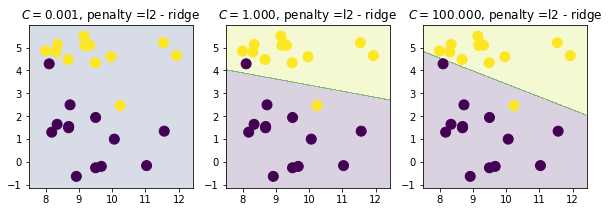

<Figure size 432x288 with 0 Axes>

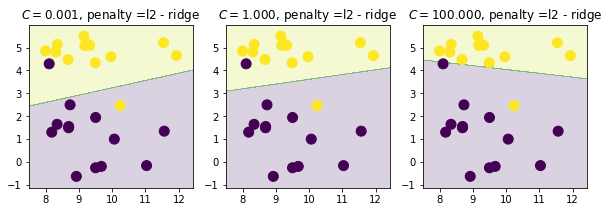

In [57]:
plt.clf()

train_score = []
test_score = []


fig, axes = plt.subplots(1,3, figsize=(10,3))
for C, ax in zip([0.001,1.0,100], axes):        # C :  smaller value, stronger regularization, less sensitive towards feature -->> prevent overfitting
    model_logistic = LogisticRegression(C=C).fit(X_train, y_train)
    train_score.append(('logistic', C, model_logistic.score(X_train, y_train)))
    test_score.append(('logistic',C, model_logistic.score(X_test, y_test)))

    plot_boundary(model_logistic, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,'l2 - ridge'))

plt.show()
plt.clf()

fig, axes = plt.subplots(1,3, figsize=(10,3))
for C, ax in zip([0.001,1.0,100], axes):        # C :  smaller value, stronger regularization, less sensitive towards feature -->> prevent overfitting
    model_svm = LinearSVC(C=C, tol=0.00001, max_iter=250000).fit(X_train, y_train)
    train_score.append(('SVM', C, model_svm.score(X_train, y_train)))
    test_score.append(('SVM',C, model_svm.score(X_test, y_test)))

    plot_boundary(model_svm, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,'l2 - ridge'))

plt.show()

# When C is extremely high (almost no regularization), both results are similar. 

In [58]:
train_score

[('logistic', 0.001, 0.5263157894736842),
 ('logistic', 1.0, 0.9473684210526315),
 ('logistic', 100, 1.0),
 ('SVM', 0.001, 0.9473684210526315),
 ('SVM', 1.0, 0.9473684210526315),
 ('SVM', 100, 1.0)]

In [59]:
test_score

# Seems like regularization is not needed. Model did not show sign of overfitting (might due to small sample size).

[('logistic', 0.001, 0.42857142857142855),
 ('logistic', 1.0, 0.8571428571428571),
 ('logistic', 100, 0.8571428571428571),
 ('SVM', 0.001, 0.8571428571428571),
 ('SVM', 1.0, 0.8571428571428571),
 ('SVM', 100, 0.8571428571428571)]

## Type of regularization

<Figure size 432x288 with 0 Axes>

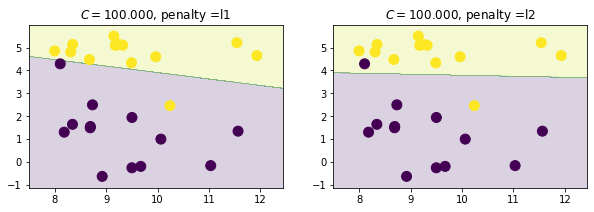

<Figure size 432x288 with 0 Axes>

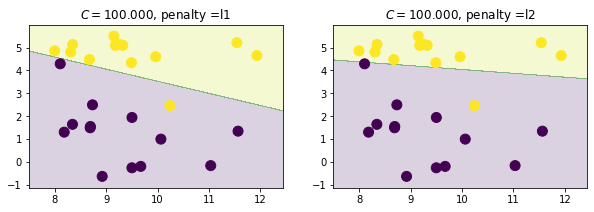

In [74]:
plt.clf()

train_score = []
test_score = []
C = 100

fig, axes = plt.subplots(1,2, figsize=(10,3))
for p, ax in zip(['l1','l2'], axes):        # l1 - lasso ; l2 - ridge 
    model_logistic = LogisticRegression(C=C, penalty=p, solver='liblinear', max_iter=250000).fit(X_train, y_train)
    train_score.append(('logistic', p, model_logistic.score(X_train, y_train)))
    test_score.append(('logistic',p, model_logistic.score(X_test, y_test)))

    plot_boundary(model_logistic, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,p))

plt.show()
plt.clf()

fig, axes = plt.subplots(1,2, figsize=(10,3))
for p, ax in zip(['l1','l2'], axes):        # l1 - lasso (remove useless feature); l2 - ridge (diminish importance of useless feature) 
    model_svm = LinearSVC(penalty=p, C=C, dual=False, tol=0.00001, max_iter=250000).fit(X_train, y_train)       # Prefer dual=False (primal optimization) when n_samples > n_features
    train_score.append(('SVM', p, model_svm.score(X_train, y_train)))
    test_score.append(('SVM',p, model_svm.score(X_test, y_test)))

    plot_boundary(model_svm, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C, p))

plt.show()

# When C is extremely high (almost no regularization), both results are similar. 

In [75]:
train_score

[('logistic', 'l1', 1.0),
 ('logistic', 'l2', 0.9473684210526315),
 ('SVM', 'l1', 1.0),
 ('SVM', 'l2', 1.0)]

In [76]:
test_score

# Seems like choice of regularization method does not matter in this case.

[('logistic', 'l1', 0.8571428571428571),
 ('logistic', 'l2', 0.8571428571428571),
 ('SVM', 'l1', 0.8571428571428571),
 ('SVM', 'l2', 0.8571428571428571)]